# Import the necessary libraries

In [1]:
import sys
import os
# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from time_series import TimeSeriesAnalysis
from correlation_analysis import CorrelationHeatmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [2]:
df = pd.read_csv('../data/togo-dapaong_qc.csv')

# Display the first few rows of the Dataframe

In [3]:
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


# Summary Statistics

In [4]:
print(df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

# Data quality

In [5]:
print(df.isnull().sum())  # Check for missing values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


# Time series

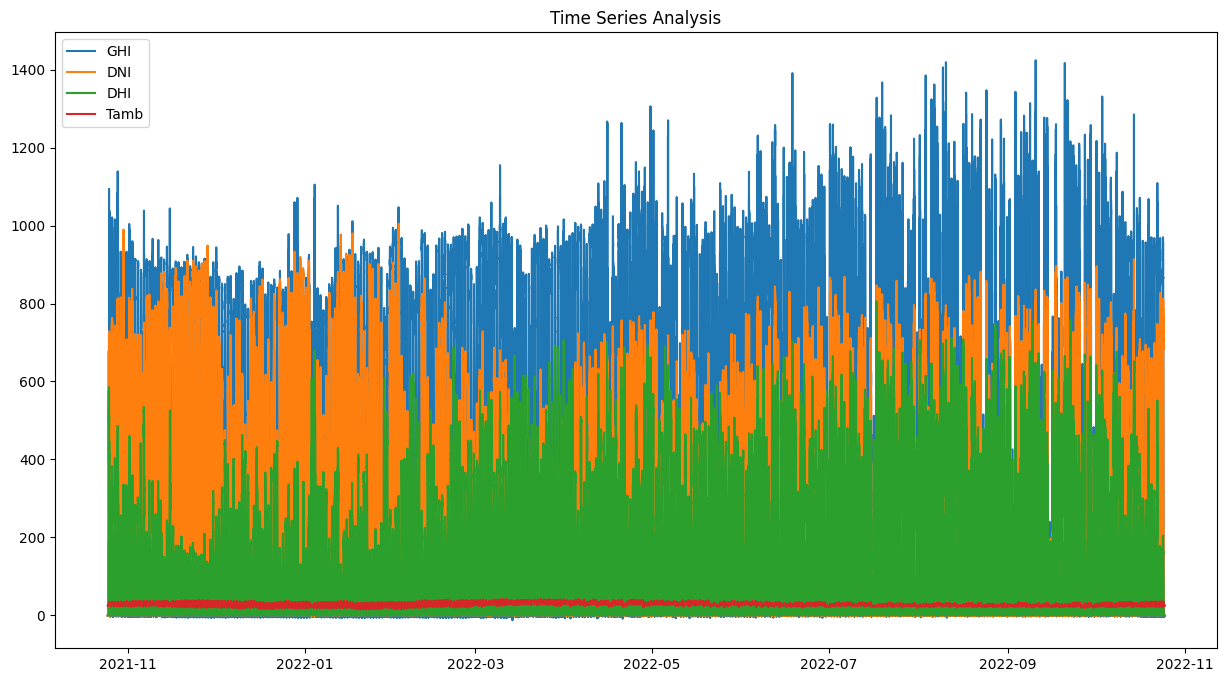

In [6]:

# Time series analysis
time_series = TimeSeriesAnalysis(df)
time_series.plot_time_series(['GHI', 'DNI', 'DHI', 'Tamb'])

# Correlation analysis

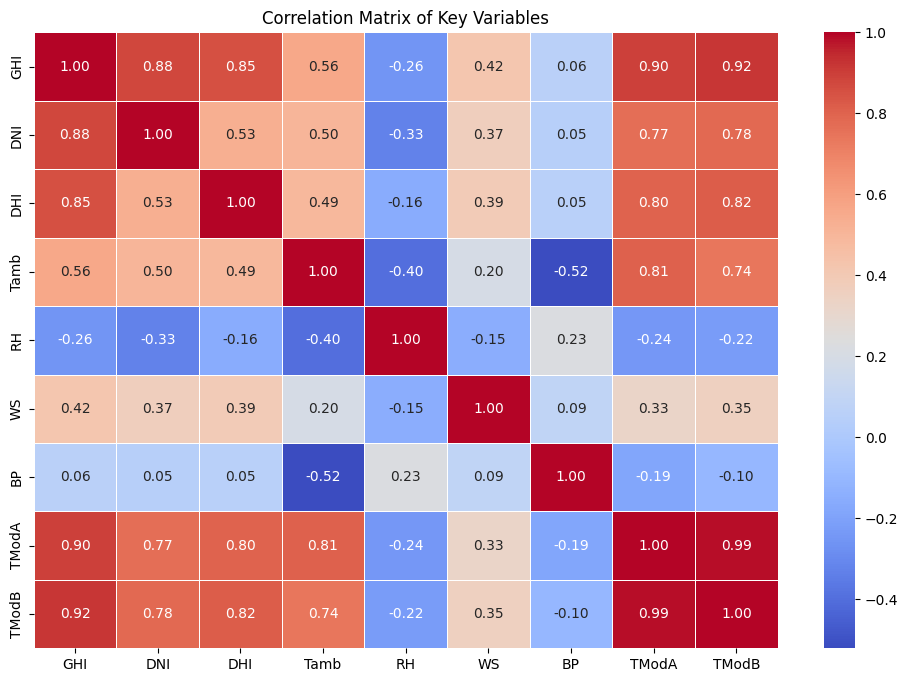

In [8]:
# Correlation heatmap analysis
heatmap = CorrelationHeatmap(df)
heatmap.plot_correlation_matrix(['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP', 'TModA', 'TModB'], 'Correlation Matrix of Key Variables')

# Wind analyis

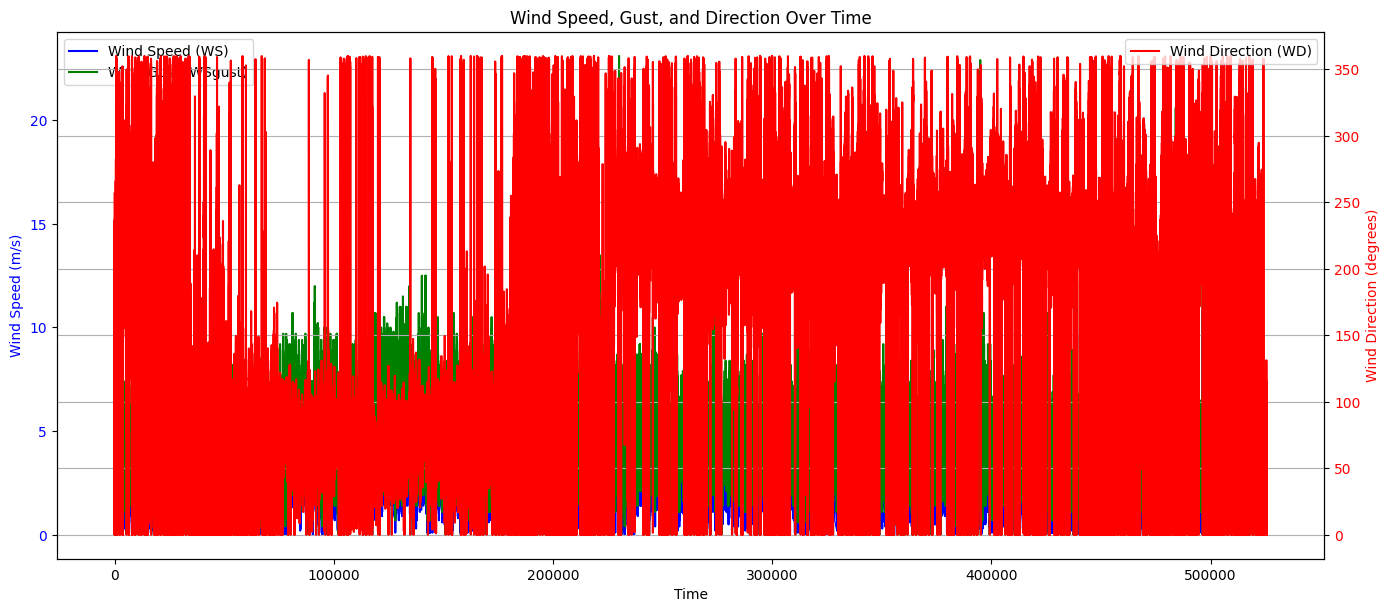

In [9]:
def plot_wind_analysis(df):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Wind speed and gust speed
    ax1.plot(df.index, df['WS'], label='Wind Speed (WS)', color='blue')
    ax1.plot(df.index, df['WSgust'], label='Wind Gust (WSgust)', color='green')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Wind Speed (m/s)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Wind direction on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df.index, df['WD'], label='Wind Direction (WD)', color='red')
    ax2.set_ylabel('Wind Direction (degrees)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Plot configurations
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('Wind Speed, Gust, and Direction Over Time')
    plt.grid(True)
    plt.show()

# Wind Speed and Direction Analysis
plot_wind_analysis(df)


# Temprature analysis

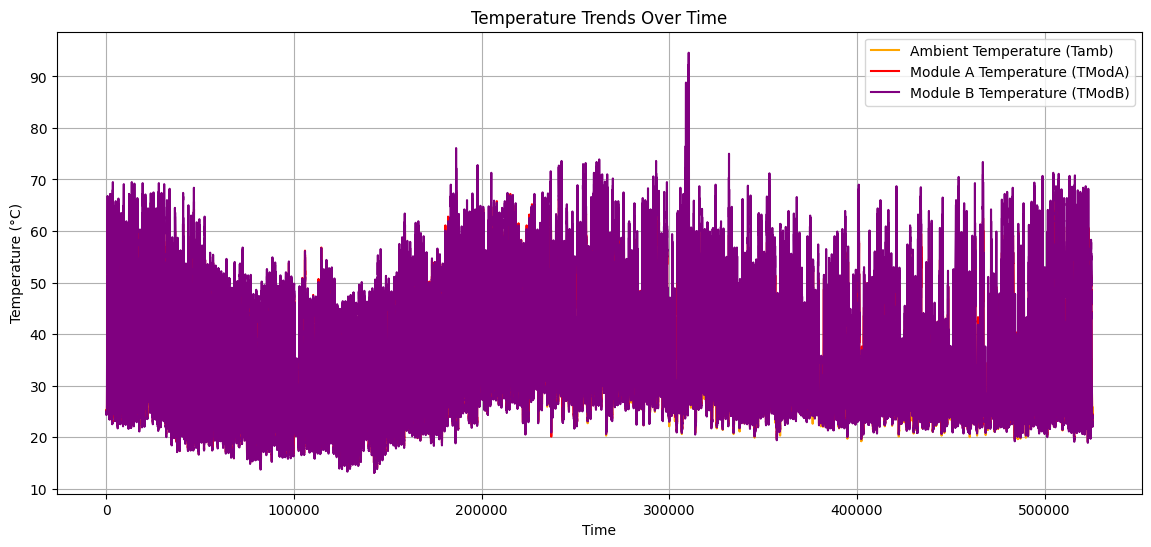

In [10]:
def plot_temperature_analysis(df):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Tamb'], label='Ambient Temperature (Tamb)', color='orange')
    plt.plot(df.index, df['TModA'], label='Module A Temperature (TModA)', color='red')
    plt.plot(df.index, df['TModB'], label='Module B Temperature (TModB)', color='purple')
    plt.title('Temperature Trends Over Time')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Temperature Trends Analysis
plot_temperature_analysis(df)


# Histogram

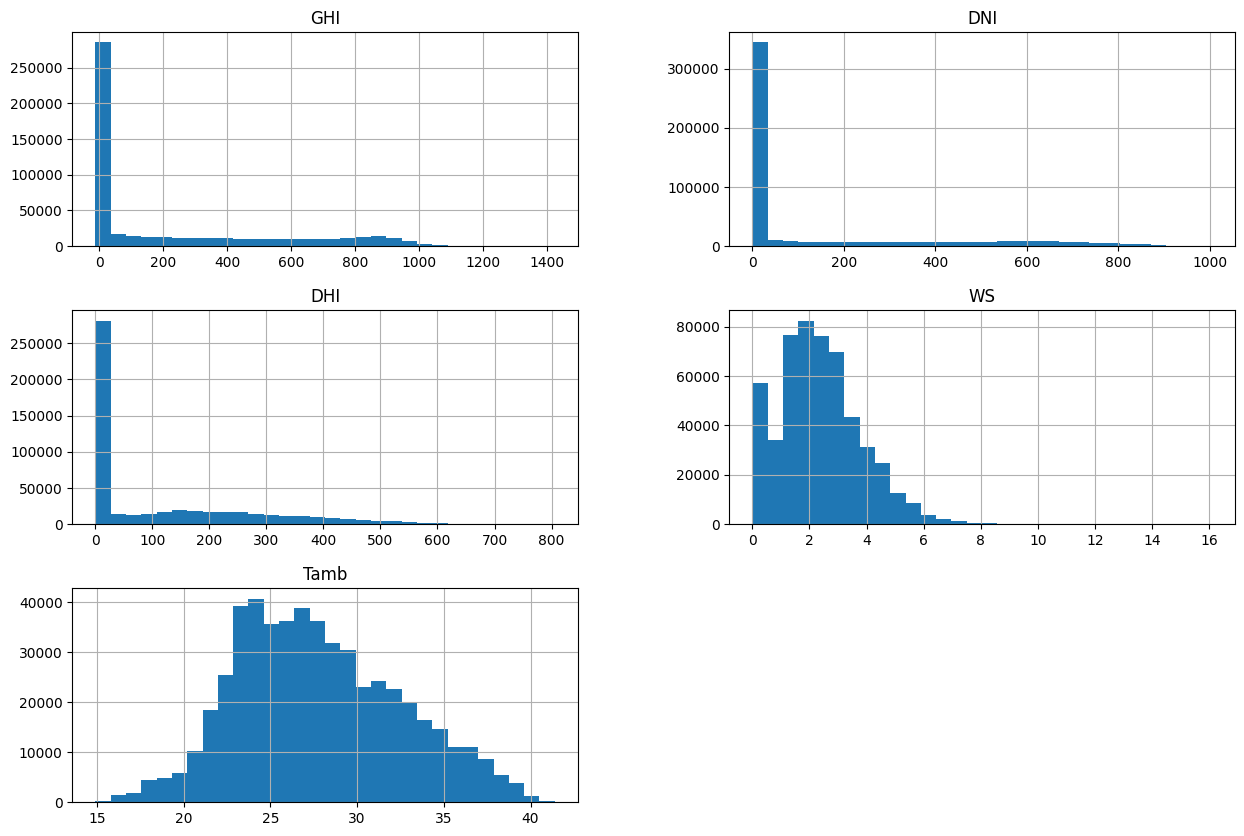

In [11]:
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=30, figsize=(15, 10))
plt.show()

# Box plot

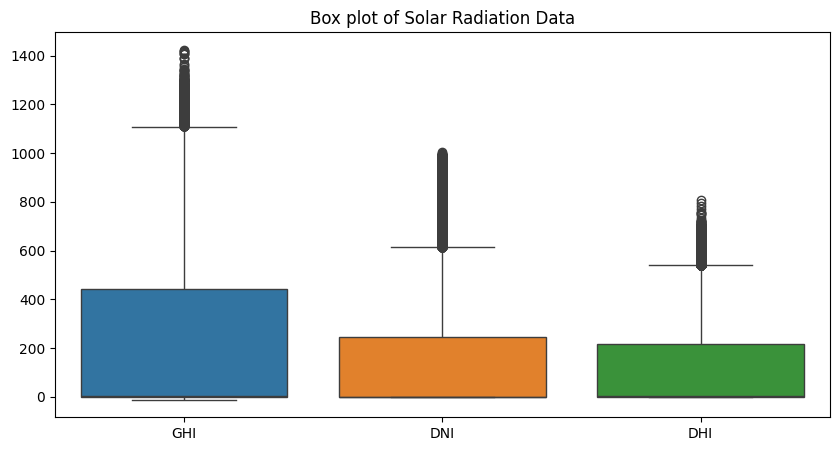

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Box plot of Solar Radiation Data')
plt.show()

# Scatter plot

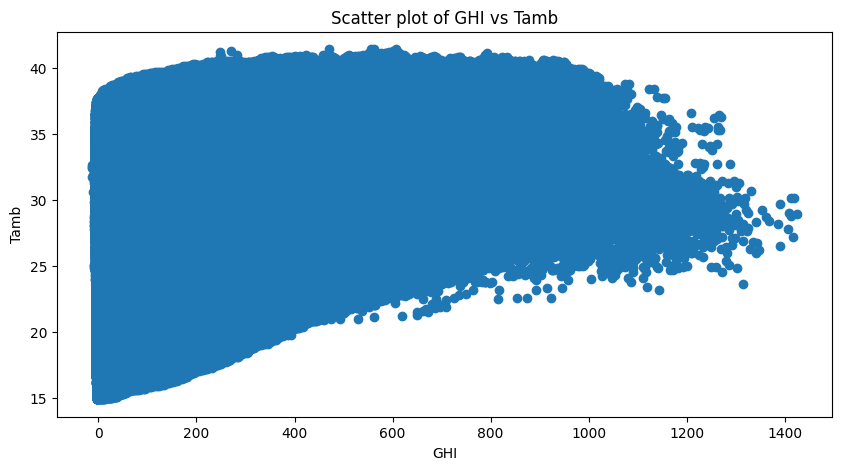

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(df['GHI'], df['Tamb'])
plt.title('Scatter plot of GHI vs Tamb')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()

# Z-score analysis

In [14]:
import numpy as np

# Function to calculate Z-Score
def z_score_analysis(data, columns, threshold=3):
    z_scores = (data[columns] - data[columns].mean()) / data[columns].std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return z_scores, outliers

# Example: Apply Z-Score Analysis to the 'Tamb' and 'WS' columns
z_scores, outliers = z_score_analysis(df, ['Tamb', 'WS'])

# Display the Z-Scores
print("Z-Scores for the selected columns:\n", z_scores.head())

# Display the outliers
outlier_data = df[outliers]
print("\nRows identified as outliers:\n", outlier_data)


Z-Scores for the selected columns:
        Tamb        WS
0 -0.620381 -1.003709
1 -0.620381 -0.866973
2 -0.620381 -0.798605
3 -0.620381 -0.798605
4 -0.620381 -0.730237

Rows identified as outliers:
                  Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
5411   2021-10-28 18:12:00 -1.0  0.0  0.0   0.0   0.0  29.3  62.4  6.9   
5413   2021-10-28 18:14:00 -0.8  0.0  0.0   0.0   0.0  28.6  63.7  7.1   
5425   2021-10-28 18:26:00 -1.3  0.0  0.0   0.0   0.0  27.3  65.0  6.9   
5429   2021-10-28 18:30:00 -1.3  0.0  0.0   0.0   0.0  27.1  65.2  6.9   
5432   2021-10-28 18:33:00 -1.4  0.0  0.0   0.0   0.0  26.9  65.6  6.9   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
509544 2022-10-13 20:25:00 -1.9  0.0  0.0   0.0   0.0  22.6  89.7  6.9   
509555 2022-10-13 20:36:00 -1.5  0.0  0.0   0.0   0.0  22.2  92.1  7.1   
509566 2022-10-13 20:47:00 -0.7  0.0  0.0   0.0   0.0  21.7  92.6  6.8   
509568 2022-10-13 20:49:00 -0.5  0.0  0.0   0.0   0.0  21.5  

# Bubble chart

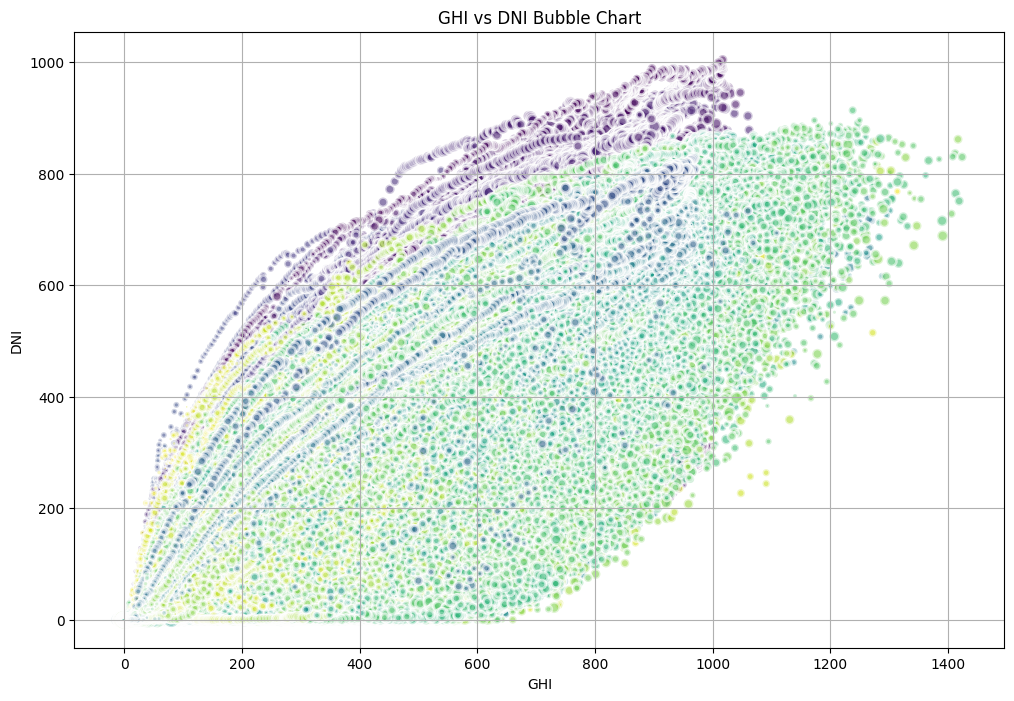

In [15]:
import matplotlib.pyplot as plt

# Function to create a Bubble Chart
def plot_bubble_chart(df, x_column, y_column, size_column, color_column=None, title="Bubble Chart"):
    plt.figure(figsize=(12, 8))
    
    # Plot bubbles
    plt.scatter(df[x_column], df[y_column], 
                s=df[size_column] * 10,  # Scale the size of bubbles
                c=df[color_column] if color_column else 'blue',  # Color by another variable or default to blue
                alpha=0.6, edgecolors="w", linewidth=2)
    
    # Set titles and labels
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Example: Create a Bubble Chart for GHI vs DNI with WS as bubble size and RH as color
plot_bubble_chart(df, x_column='GHI', y_column='DNI', size_column='WS', color_column='RH', title="GHI vs DNI Bubble Chart")


# Data cleaning

In [16]:
df = df.drop(columns=['Comments'])  # Drop the 'Comments' column as it is entirely null